In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn import metrics

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/DATASET/XOM.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,77.500000,77.940002,76.459999,77.459999,55.863224,20400100
1,2016-01-05,77.190002,78.139999,76.919998,78.120003,56.339207,11993500
2,2016-01-06,76.639999,77.639999,76.589996,77.470001,55.870419,18826900
3,2016-01-07,76.059998,77.989998,75.900002,76.230003,54.976170,21263800
4,2016-01-08,76.349998,76.650002,74.500000,74.690002,53.865532,19033600


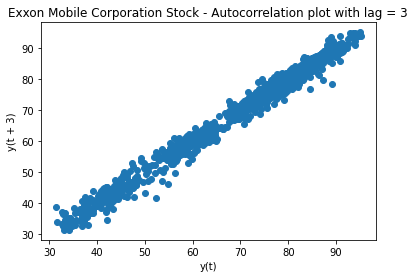

In [3]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('Exxon Mobile Corporation Stock - Autocorrelation plot with lag = 3')
plt.show()

In [4]:
int(len(df)*0.7)

1057

In [5]:
df.shape

(1510, 7)

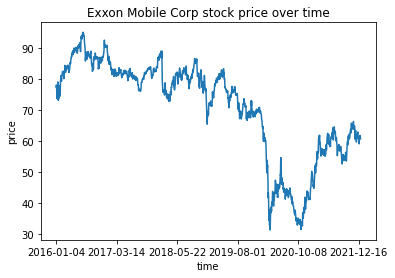

In [6]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1510, 300), df['Date'][0:1510:300])
plt.title("Exxon Mobile Corp stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
# divide the data into a training (70%) and test (30%) set.
#p=4, d=1, q=0
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [8]:
MAE_error = metrics.mean_absolute_error(test_data, model_predictions)
RMSE_error = np.sqrt(metrics.mean_squared_error(test_data, model_predictions))
MSE_error = metrics.mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))
print('Testing Root Mean Squared Error is {}'.format(RMSE_error))

Testing Mean Squared Error is 1.4008346048910905
Testing Mean Absolute Error is 0.9094842552065512
Testing Root Mean Squared Error is 1.1835685890099865


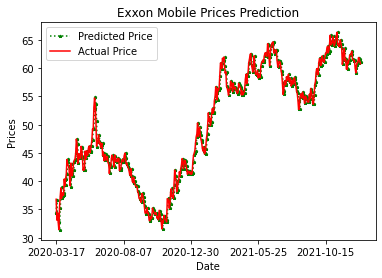

In [9]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='green', marker='*',markersize=3, linestyle='dotted',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Exxon Mobile Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1057,1510,100), df.Date[1057:1510:100])
plt.legend()
plt.show()

In [10]:
arr = np.array(model_predictions)
print(arr)

[34.38129136 36.7192383  33.24813297 34.21340461 32.8293484  31.38723518
 35.18518082 37.44201819 38.99157393 37.07539557 37.39501914 37.95589175
 37.58254394 40.30562603 39.39294903 40.41311196 41.24118639 43.85093723
 43.31636687 42.76290438 42.39959209 40.51319626 39.06207967 43.00382241
 41.47020607 40.94154245 41.99963429 43.46261235 43.81100051 43.97017469
 44.94906162 47.4378452  46.65285653 43.24786022 44.66485637 44.82683179
 44.04751719 44.20262212 46.09814296 45.82972871 44.21292018 41.94966739
 42.17513156 41.96557071 45.21408225 44.11255843 45.30055829 44.65425492
 44.57371808 45.85430146 46.27612781 45.11748518 45.41770001 46.24987786
 47.29732213 49.22045782 49.19818382 52.96073674 54.88428246 53.70659661
 50.73523493 46.12692742 46.97852119 47.20283398 48.21751206 46.7055793
 46.84512918 46.01937768 46.37506599 46.7155935  44.56961205 45.06034149
 43.69899844 44.24305709 44.74248612 43.76365537 44.02002919 44.39750625
 43.29262972 43.09147459 41.40716461 42.5446134  42.

In [11]:
df = pd.DataFrame(arr, columns =['Open'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Open
0,34.381291
1,36.719238
2,33.248133
3,34.213405
4,32.829348
...,...
448,61.033956
449,60.987639
450,61.849215
451,61.697996


In [12]:
df.to_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_XOM.csv",index=None)
df.head(5)

,Open
0,34.381291
1,36.719238
2,33.248133
3,34.213405
4,32.829348
